## Načteme si potřebné knihovny

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

pd.set_option('display.float_format', lambda x: '%.0f' % x)

## Načtení dat do DataFrame

Ze souboru `spotify-2023.csv` umístěném ve stejném adresáři načteme data a vytvoříme Pandas DataFrame.


In [2]:
df = pd.read_csv("spotify-2023.csv", encoding="utf-8", encoding_errors="ignore")
columns_to_convert = ['streams', 'in_deezer_playlists', 'in_shazam_charts']

df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


## Zkoumání jednotlivých atributů datové sady

In [3]:
# Zkoumáme datový typ jednotlivých sloupců
data_types = df.dtypes
data_types
# df.info()

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

### Z výpisu typů jednotlivých atributů vidíme, že `streams`, `in_deezer_playlists` a `in_shazam_charts` jsou typu object. Tyto atributy bychom chtěli převést na číslo a odstranit nevhodné řádky

In [4]:
df['streams'] = pd.to_numeric(df['streams'].replace({',': ''}, regex=True), errors='coerce')
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'].replace({',': ''}, regex=True), errors='coerce')
df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'].replace({',': ''}, regex=True), errors='coerce')

df = df.dropna(subset=['streams', 'in_deezer_playlists', 'in_shazam_charts'])

data_types = df.dtypes
data_types

track_name               object
artist(s)_name           object
artist_count              int64
released_year             int64
released_month            int64
released_day              int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                 float64
in_apple_playlists        int64
in_apple_charts           int64
in_deezer_playlists       int64
in_deezer_charts          int64
in_shazam_charts        float64
bpm                       int64
key                      object
mode                     object
danceability_%            int64
valence_%                 int64
energy_%                  int64
acousticness_%            int64
instrumentalness_%        int64
liveness_%                int64
speechiness_%             int64
dtype: object

In [5]:
# Zkoumáme počet hodnot v jednotlivých sloupcích
distinct_values = df.nunique()
distinct_values

track_name              891
artist(s)_name          613
artist_count              8
released_year            49
released_month           12
released_day             31
in_spotify_playlists    828
in_spotify_charts        80
streams                 898
in_apple_playlists      214
in_apple_charts         165
in_deezer_playlists     313
in_deezer_charts         32
in_shazam_charts        198
bpm                     123
key                      11
mode                      2
danceability_%           71
valence_%                94
energy_%                 80
acousticness_%           97
instrumentalness_%       39
liveness_%               67
speechiness_%            48
dtype: int64

In [6]:
# Zkoumáme nejčastější hodnoty v jednotlivých sloupcích
most_occuring_values = df.mode().iloc[0]
most_occuring_values

track_name                          
artist(s)_name          Taylor Swift
artist_count                       1
released_year                   2022
released_month                     5
released_day                       1
in_spotify_playlists              86
in_spotify_charts                  0
streams                    156338624
in_apple_playlists                 0
in_apple_charts                    0
in_deezer_playlists                0
in_deezer_charts                   0
in_shazam_charts                   0
bpm                              120
key                               C#
mode                           Major
danceability_%                    70
valence_%                         24
energy_%                          62
acousticness_%                     0
instrumentalness_%                 0
liveness_%                        11
speechiness_%                      4
Name: 0, dtype: object

In [7]:
# Zkoumáme rozsah hodnot v jednotlivých sloupcích
value_ranges = df.describe().loc[['min', '50%', 'max']]
value_ranges

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
min,1,1930,1,1,31,0,2762,0,0,0,0,0,65,23,4,9,0,0,3,2
50%,1,2022,5,13,2008,3,269727954,32,35,40,0,2,120,69,51,66,17,0,12,6
max,8,2023,12,31,52898,147,3562543890,532,275,12367,58,1451,206,96,97,97,97,91,97,64


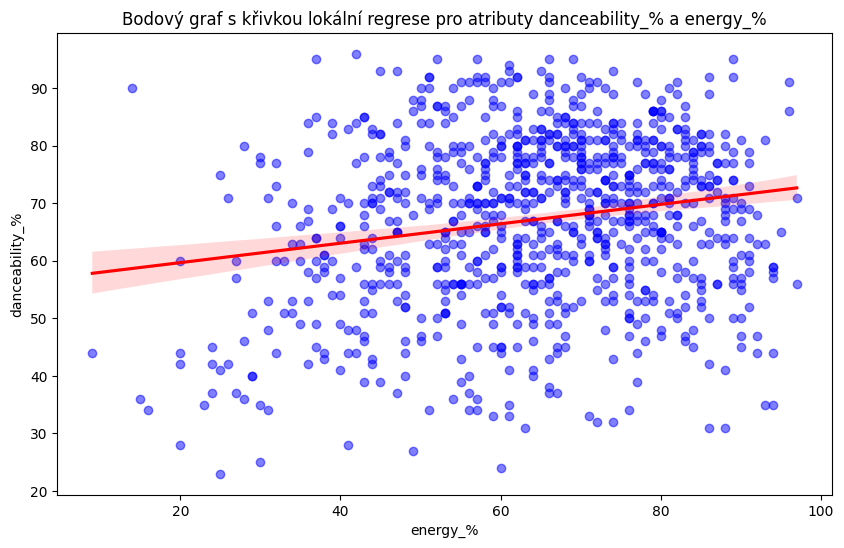

In [8]:
x_attribute = 'energy_%'
y_attribute = 'danceability_%'

plt.figure(figsize=(10, 6))
sns.regplot(x=x_attribute, y=y_attribute, data=df, scatter_kws={'alpha': 0.5, 'color': 'blue'}, line_kws={'color': 'red'})
plt.title(f'Bodový graf s křivkou lokální regrese pro atributy danceability_% a energy_%')
plt.xlabel(x_attribute)
plt.ylabel(y_attribute)
plt.show()


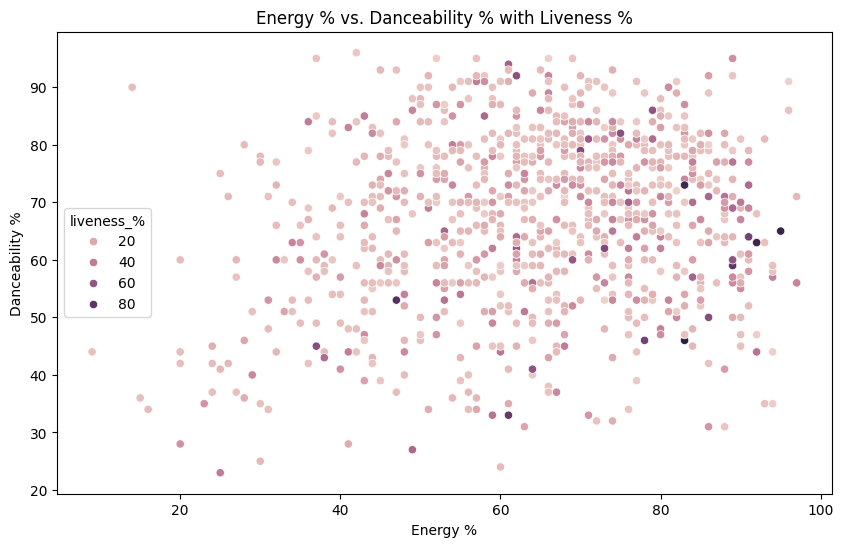

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='energy_%', y='danceability_%', data=df, hue='liveness_%')
plt.title('Energy % vs. Danceability % with Liveness %')
plt.xlabel('Energy %')
plt.ylabel('Danceability %')
plt.show()


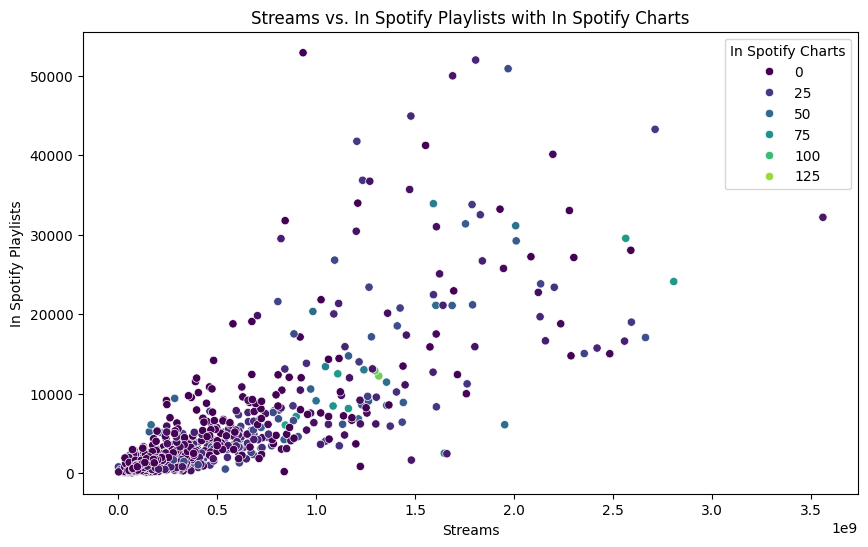

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='streams', y='in_spotify_playlists', data=df, hue='in_spotify_charts', palette='viridis')
plt.title('Streams vs. In Spotify Playlists with In Spotify Charts')
plt.xlabel('Streams')
plt.ylabel('In Spotify Playlists')
plt.legend(title='In Spotify Charts')
plt.show()

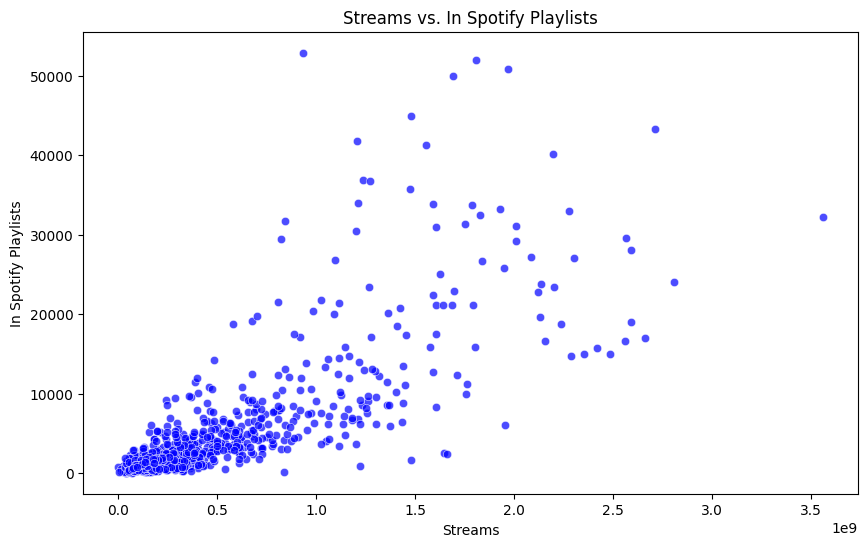

In [11]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='streams', y='in_spotify_playlists', data=df, color='blue', alpha=0.7)
plt.title('Streams vs. In Spotify Playlists')
plt.xlabel('Streams')
plt.ylabel('In Spotify Playlists')
plt.show()

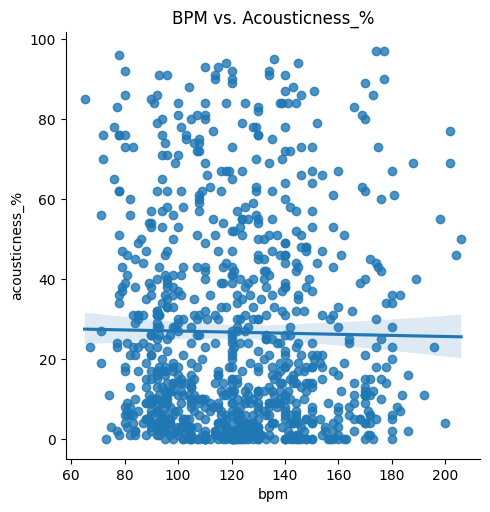

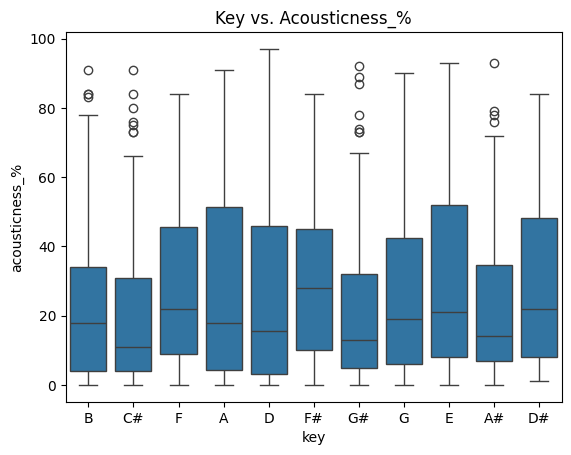

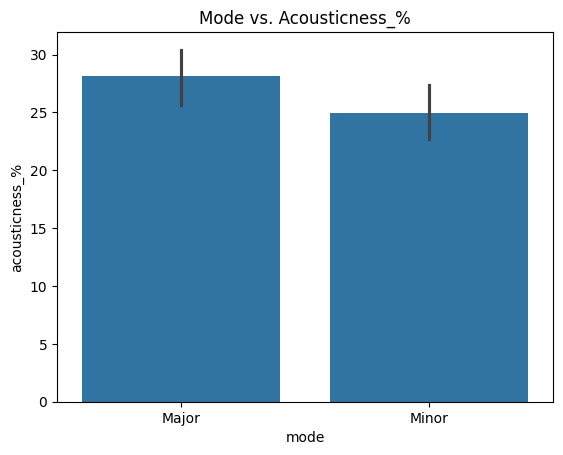

In [14]:
sns.lmplot(x='bpm', y='acousticness_%', data=df)
plt.title('BPM vs. Acousticness_%')
plt.show()

# Box plot for key vs. acousticness_%
sns.boxplot(x='key', y='acousticness_%', data=df)
plt.title('Key vs. Acousticness_%')
plt.show()

# Bar plot for mode vs. acousticness_%
sns.barplot(x='mode', y='acousticness_%', data=df)
plt.title('Mode vs. Acousticness_%')
plt.show()

## Čištění dat

In [12]:
df.loc[:, 'streams'] = pd.to_numeric(df['streams'], errors='coerce')
df['streams'] = df['streams'].fillna(0)
df = df.dropna(subset=['streams'])

df

/tmp/ipykernel_13128/3939194879.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['streams'] = df['streams'].fillna(0)


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [13]:
new_df = df.sort_values(by="streams", ascending= False)
new_df[["track_name", "streams", "danceability_%", "bpm", "key", "mode", "valence_%", "energy_%", "acousticness_%", "instrumentalness_%", "liveness_%", "speechiness_%"]]

,track_name,streams,danceability_%,bpm,key,mode,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
179,Shape of You,3562543890,83,96,C#,Minor,93,65,58,0,9,8
41,Sunflower - Spider-Man: Into the Spider-Verse,2808096550,76,90,D,Major,91,50,54,0,7,5
162,One Dance,2713922350,77,104,C#,Major,36,63,1,0,36,5
84,STAY (with Justin Bieber),2665343922,59,170,C#,Major,48,76,4,0,10,5
140,Believer,2594040133,77,125,A#,Minor,74,78,4,0,23,11
...,...,...,...,...,...,...,...,...,...,...,...,...
68,Overdrive,14780425,56,140,C#,Major,48,73,0,0,35,4
142,"Gol Bolinha, Gol Quadrado 2",11956641,93,133,B,Minor,68,65,42,0,12,25
144,QUEMA,11599388,79,97,NaN,Major,92,89,5,0,6,5
393,Jhoome Jo Pathaan,1365184,82,105,G,Major,62,74,10,0,33,7
